In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# LUNG CANCER CLASSIFICATION USING SUPPORT VECTOR MACHINE

## IMPORT LIBRARY

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. READ DATA FROM CSV FILE

In [40]:
pathData = '/content/drive/MyDrive/AI_project/Lung_cancer_classification_using_SVM/Dataset/lung_cancer.csv'

In [41]:
df = pd.read_csv(pathData)

In [42]:
df

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [44]:
# Delete column name and surname
df.drop(columns=['Name','Surname'], inplace=True)

In [45]:
# Check the column information again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     59 non-null     int64
 1   Smokes  59 non-null     int64
 2   AreaQ   59 non-null     int64
 3   Alkhol  59 non-null     int64
 4   Result  59 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


## 2. VISUALIZING THE DATA

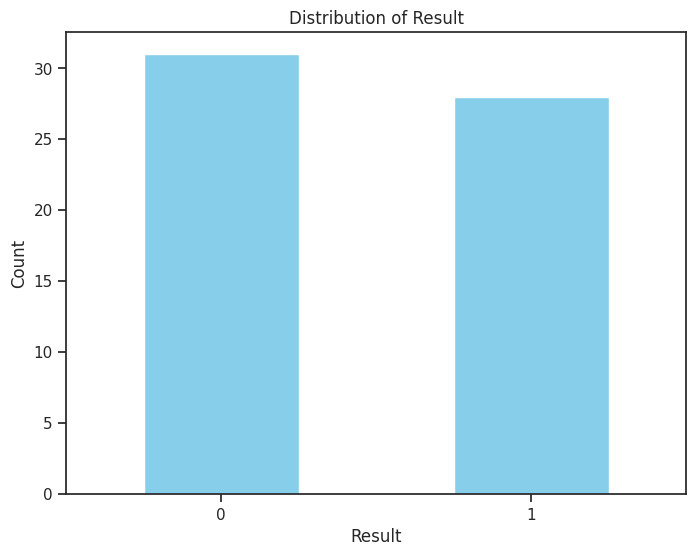

In [46]:
# Calculate the number of samples for each value of column "Result"
result_counts = df['Result'].value_counts()

# Draw a column chart
plt.figure(figsize=(8, 6))
result_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Distribution of Result')
plt.xticks(rotation=0)
plt.show()

### Draw a chart to analyze the data distribution as shown below

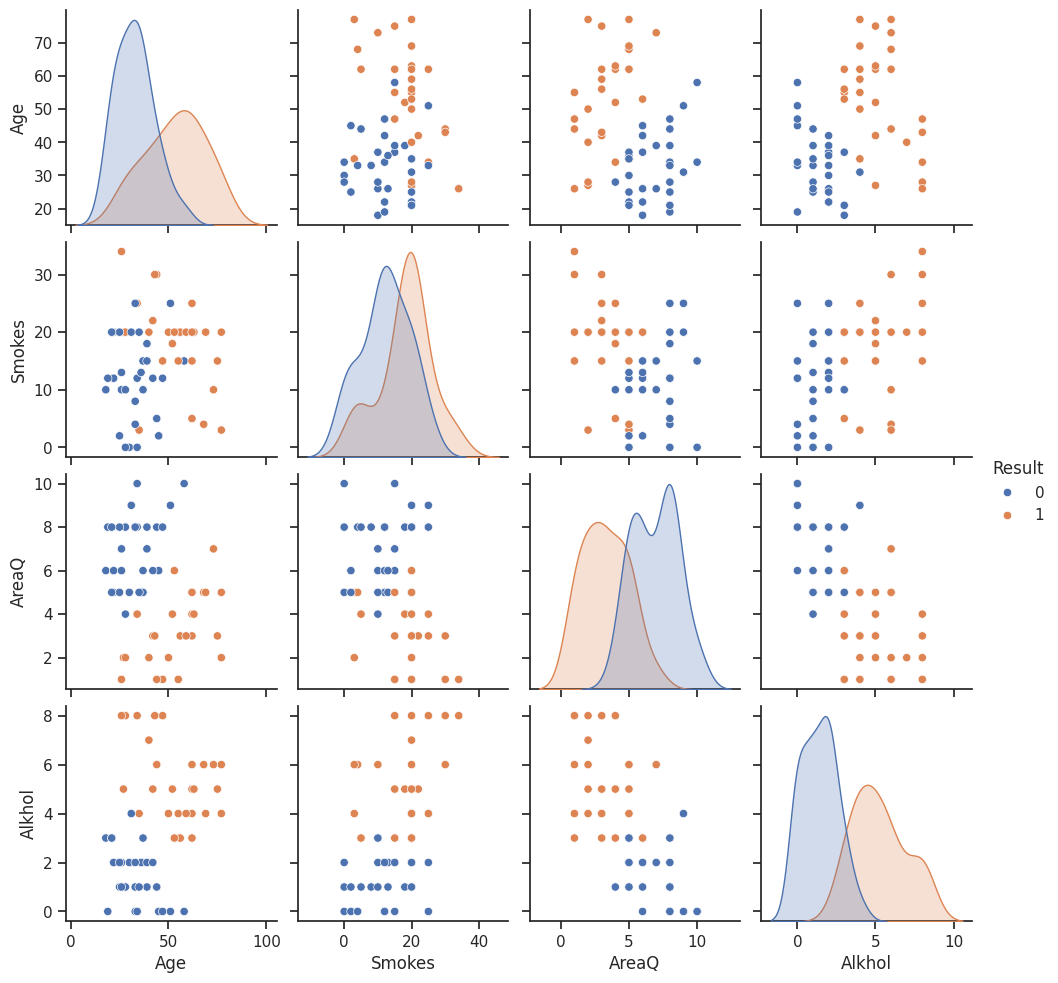

In [49]:
sns.set_theme(style="ticks")

sns.pairplot(df, hue="Result")

In [50]:

# Create X_train from columns Age, Smokes, AreaQ, and Alkhol
X_train = df[['Age', 'Smokes', 'AreaQ', 'Alkhol']]

# Create Y_train from column 'Result'
Y_train = df['Result']


In [51]:
X_train.shape
Y_train.shape

(59,)

## 3. DATA FOR TRAINING AND TESTING

### Split the dataset into 2 sets of train and test with train = 80% and test = 20%, random_state = 42

In [52]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [101]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (32, 4)
Y train shape:  (32,)
X test shape:  (9, 4)
Y test shape:  (9,)


## 4. Build model

In [102]:
from sklearn.svm import SVC

In [103]:
model = SVC(C=10, probability=True, random_state=9)

In [104]:
model = model.fit(X_train, Y_train)

In [105]:
model.predict(X_test)

array([0, 1, 0, 0, 0, 0, 1, 1, 1])

In [106]:
model.predict_proba(X_test)

array([[0.98639176, 0.01360824],
       [0.01675238, 0.98324762],
       [0.98254769, 0.01745231],
       [0.86862231, 0.13137769],
       [0.88703358, 0.11296642],
       [0.75000021, 0.24999979],
       [0.04903051, 0.95096949],
       [0.0194124 , 0.9805876 ],
       [0.22051788, 0.77948212]])

## 5. Results and reviews

In [110]:
from sklearn.metrics import confusion_matrix

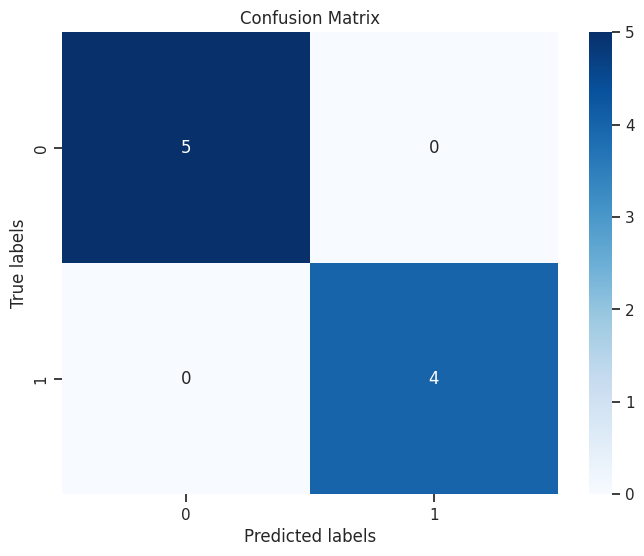

In [111]:

# Predict labels on the test set
Y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Draw confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [112]:
from sklearn.metrics import classification_report

# Classification report
target_names = ['Not Sick', 'Sick'] #0 means not sick, 1 means sick
print(classification_report(Y_test, Y_pred, target_names=target_names))



              precision    recall  f1-score   support

    Not Sick       1.00      1.00      1.00         5
        Sick       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [113]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score on the test set
test_accuracy = accuracy_score(Y_test, Y_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 1.0
